# A linear map L

$$
\text{L}: \left \lbrack\begin{array}{c}x \\y\end{array}\right\rbrack
\mapsto
\left \lbrack\begin{array}{rcr}2x & + & y\\x  & + & 2y\end{array}\right\rbrack
$$

A very good way to get a feel for what a linear map does is to plot a set of
points.  For some maps, it is particular useful to map polygons. 

Below we plot what this linear map  L does to the unit square:


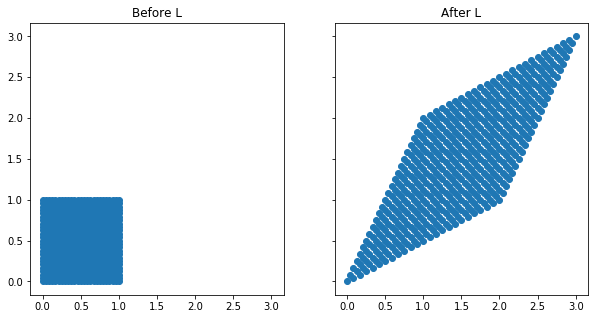

In [57]:
#import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

def LinMap (x,y):
    """
    The map for the matrix:
   
       |2  1|
       |1  2|    
    """
    return ((2*x) + y, x + (2*y))

def plot_mapping (X,Y, LX, LY, name = 'L',figsize=(10,5)):
    """
    X: A an array of the X vals to be mapped, Y: an array of the Y vals.
    
    LX, LY the same for the mapped points.
    
    Gives a 1 x 2 display; show the input points next to their mapping.
    
    
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = figsize,
                                   sharey=True,sharex=True)
    ax1.set_title('Before {0}'.format(name))
    ax1.scatter(X,Y)
    ax2.set_title('After {0}'.format(name))
    ax2.scatter(LX,LY)

def make_meshgrid (xmin=0, xmax=1, ymin=0, ymax=1, nx=25, ny=25):

    """
    Makes a grid (a numpy 2D array).  Default: 25x25 (=625) grid 
    points.
    
    default values for xmin,xmax,ymin,ymax give unit square.
    """
    x,y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
    # Return A pair: Xcoords,Ycoords of all points in the grid
    return np.meshgrid(x, y)

def make_line_segment (vec=None, f = None, xmin=0,xmax=1,nx=25):
    """
    Return a pair of xvals and yvals specifying points on the 
    line defined by either `vec` or `f`.
    """
    assert not ((vec is not None) and (f is not None)), \
          'Must supply either a vector (vec=) or a function (f=) not both'
    x = np.linspace(xmin, xmax, nx)
    if f is not None:
        return x, f(x)
    elif vec is not None:
        try:
            x0,y0 = vec
        except:
            print('Only R2 handled now')
        slope = y0/x0
        return x, slope*x
    else:
        print('Must supply either a vector (vec=) or a function (f=)')
        raise ValueError

# Xcoords,Ycoords of all 625 grid points in the unit square
xv, yv = make_meshgrid ()

# taking advantage of ufunctions, map 625 points
(sxv,syv) = LinMap(xv,yv)

plot_mapping (xv,yv,sxv,syv)

We get a parallelogram.  It **looks like** the sides of the square are getting
turned into the sides of the parallelogram. And it **looks like** all the points
inside the square are mapped to points inside the parallelogram.

## Using matrix multiplication

We represent the map as 2x2 matrix, or in `numpy` terms, a 2D array.

In [5]:
L = np.array([[2,1],[1,2]])
print(L)

[[2 1]
 [1 2]]


To map a vector we do matrix multiplication.  Let's map the upper right hand corner of the square:

$$
\left \lbrack\begin{array}{c}{\mathbf 1} \\{\mathbf 1}\end{array}\right\rbrack
\mapsto
\left \lbrack\begin{array}{rcr}
2\cdot{\mathbf 1}  & + & 1\cdot {\mathbf 1}\\
1\cdot{\mathbf 1}  & + & 2\cdot {\mathbf 1}\end{array}
\right\rbrack
=
\left \lbrack\begin{array}{c}3 \\3\end{array}\right\rbrack
$$

As a matrix multiplication we'd write it:

$$
\left \lbrack\begin{array}{rcr}2 & 1\\1 & 2 \end{array}\right\rbrack
\left \lbrack\begin{array}{c}{\mathbf 1 }\\{\mathbf 1}\end{array}\right\rbrack
=
\left \lbrack\begin{array}{c}3 \\3\end{array}\right\rbrack
$$


And in `numpy`:

In [6]:
L.dot(np.array([1,1]))

array([3, 3])


Let's try mapping the 4 corners of the unit square
```
(0,0),(0,1), (1,0), (1,1)
```

## Corners of the unit square

To map multiple vectors $v_i$ create a matrix in which each
$v_i$ is a column vector.

In [7]:
U = np.array([[0,0,1,1],[0,1,0,1]])
print(U)

[[0 0 1 1]
 [0 1 0 1]]


Now use the `dot` method as before.  Each column $\text{V}_{i}$ of $\text{V}$  is equal to
$\text{L}(\text{U}_{i})$.

In [9]:
V = L.dot(U)
print(U)
print('    ==>')
print(V)

[[0 0 1 1]
 [0 1 0 1]]
    ==>
[[0 1 2 3]
 [0 2 1 3]]


`L.dot(U)` is equivalent to the standard mathematical definition of the matrix product LU.

Plot the map of the 4 corners.

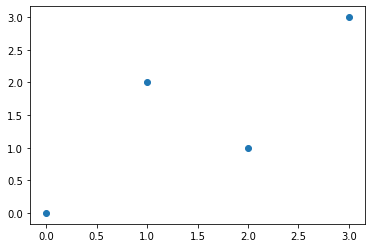

In [10]:
plt.scatter(V[0,:],V[1,:])

As suspected, the corners of the square are mapped to the corners of the parallelogram.

To use the 2D array `L` on the 625-point meshgrid above that represents our entire square, we proceed as we
did when plotting the four corners.  We need a 2x625 array in place of
a 2x4 array.

We flatten the  `xv` and `yv` arrays into 1D arrays (625,), and use them as 
the rows of a  2 x 625 array.

Then we map 625 2D vectors by one matrix multiplication.  It's no more code than
the Linear Map function we wrote above, but it's faster.

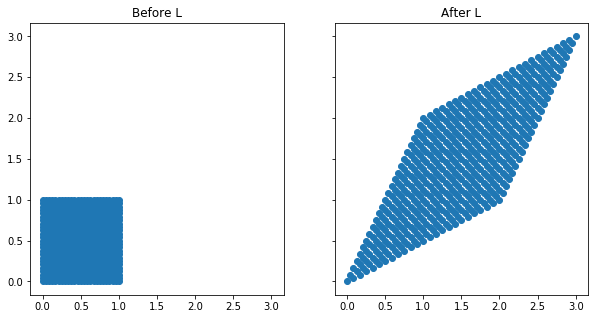

In [11]:
# equivalent to np.array([np.ravel(xv),np.ravel(yv)])
U = np.vstack([np.ravel(xv),np.ravel(yv)])
V = L.dot(U)
plot_mapping (xv, yv, V[0,:], V[1,:])

# Finding the matrix M for a linear map L

We write ${\mathbb R}^{2}$ for the set of all the $\left\lbrack \begin{array}{c} x\\ y \end{array} \right\rbrack$ vectors in the xy plane.  There are two vectors in ${\mathbb R}^{2}$ of particular interest:

 $$
 \begin{array}[t]{lr}
 e_{1} = \left\lbrack \begin{array}{c} 1\\ 0\end{array} \right\rbrack
 &
 e_{2} = \left\lbrack \begin{array}{c} 0\\ 1\end{array} \right\rbrack
 \end{array}
 $$
 
 $e_{1}$ and $e_{2}$ are called the **standard basis vectors**.  
 They are computationally and mathematically interesting
 because any vector $\left\lbrack \begin{array}{c} x\\ y \end{array} \right\rbrack$  can be written
 as a **linear combination** of  $e_{1}$ and $e_{2}$ in a particularly simple way.
 
 $$
 \begin{array}[t]{lcr}
 \left\lbrack \begin{array}{c} x\\ y\end{array} \right\rbrack
 & = & 
 x \left\lbrack \begin{array}{c} 1\\ 0\end{array} \right\rbrack
 \;+\;
 y \left\lbrack \begin{array}{c} 0\\ 1\end{array} \right\rbrack
 \end{array}
 $$
 
 This in turn means that the effect of any linear map  L from ${\mathbb R}^{2}$  to ${\mathbb R}^{2}$ 
 can be written:
 
 $$
 \begin{array}[t]{lcr}
 \text{L} \left ( \left \lbrack \begin{array}{c} x\\ y\end{array} \right\rbrack \right )
 & = & 
 x \;\text{L} \left  ( \left \lbrack \begin{array}{c} 1\\ 0\end{array} \right\rbrack \right )
 \;+\;
 y \;\text{L} \left ( \left\lbrack \begin{array}{c} 0\\ 1\end{array} \right\rbrack \right )
 \end{array}
 $$
 
 So if we know the effect of L on $e_{1}$ and $e_{2}$, we've uniquely defined L.

Now all this is particularly helpful when it comes to finding the matrix M that represents
a particular mapping L.  Why?  Because applying L to a vector v corresponds to 
matrix multiplying M by v, and
under the definition of matrix multiplication, multiplication of
any matrix by a standard basis yields one of the **columns** of the matrix.  For instance, to
get the first column of `L`, we multiply its matrix by $e_{1}$:

$$
\left \lbrack\begin{array}{rcr}2 & 1\\1 & 2 \end{array}\right\rbrack
\left \lbrack\begin{array}{c}{\mathbf 1 }\\{\mathbf 0}\end{array}\right\rbrack
=
\left \lbrack\begin{array}{c}2 \\1\end{array}\right\rbrack
$$

To get the second column of `L`, we multiply its matrix by $e_{2}$:

$$
\left \lbrack\begin{array}{rcr}2 & 1\\1 & 2 \end{array}\right\rbrack
\left \lbrack\begin{array}{c}{\mathbf 0 }\\{\mathbf 1}\end{array}\right\rbrack
=
\left \lbrack\begin{array}{c}1 \\2\end{array}\right\rbrack
$$

In python (`numpy`):

In [12]:
e1, e2 = np.array([1,0]),np.array([0,1])

print(L.dot(e1))  # First col
print(L.dot(e2))  # Second col

[2 1]
[1 2]


In other words, to get a complete definition of the  matrix that represents any linear mapping L,
we simply find  the results of applying L to $e_{1}$ and $e_{2}$.

In the next few sections, we explore some examples implementing this idea.

## Rotation

For example, suppose we want to rotate the plane by $30^{\circ} = \pi/6$.  A little trig
show us that that moves 

$$
\left \lbrack\begin{array}{c}{\mathbf 1} \\{\mathbf 0}\end{array}\right\rbrack
$$

to 

$$
\left \lbrack\begin{array}{c}\cos \pi / 6\\ \sin\pi / 6\end{array}\right\rbrack
$$

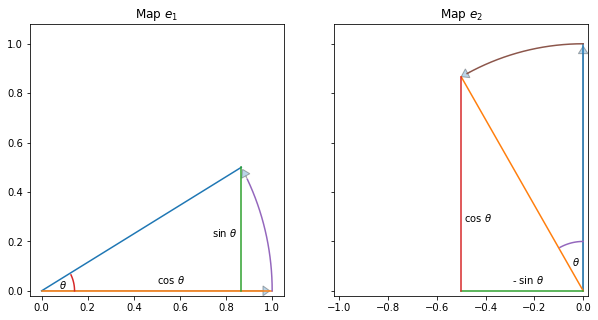

In [14]:
from matplotlib import rc
import numpy as np

#rc('font', **{'family':'sansserif','sansserif':['Palatino']})
#rc('text', usetex=True)
theta = np.pi/6
nx,ny = 25,25
#ray = np.array([np.cos(theta),np.sin(theta)])
#xs,ys = make_line_segment (vec=ray, xmin=0,xmax=np.cos(theta),nx=25)

#cs = np.cos(theta) * np.ones(nx)
#ray2 = np.linspace(0,np.sin(theta),ny)

fig, (ax,ax2)  = plt.subplots(1, 2, figsize = (10,5), sharey=True,sharex=False)
ax.set_title('Map $e_{1}$')
ax.set_ylim(-.02,1.08)

# hypotenuse
ray = np.array([np.cos(theta),np.sin(theta)])
xs,ys = make_line_segment (vec=ray, xmin=0,xmax=np.cos(theta),nx=25)
ax.plot(xs,ys)
# horizontal leg
zs = np.zeros(nx)
ax.plot(np.linspace(0,1,nx),zs)
# vertical leg
cs = np.cos(theta) * np.ones(nx)
ray2 = np.linspace(0,np.sin(theta),ny)
ax.plot(cs,ray2)

def draw_angles (theta, ax, shrink_fac = 8, angle_gap = 1):
    ###  Angle arc
    angle_ts = np.linspace(0,theta,20)
    # Leave room for an arrowhead
    angle_xs = np.cos(angle_ts)[:-angle_gap]
    angle_ys = np.sin(angle_ts)[:-angle_gap]
    # Draw the teensy angle the ray makes with x-axis
    # Adjust shrink_fac to make arc bigger/smaller
    ax.plot(angle_xs/shrink_fac,angle_ys/shrink_fac)
    # Circle arc
    # Draw the big arc showing the sweep of the rotation
    ax.plot(angle_xs,angle_ys)

shrink_fac,angle_gap = 7,2
draw_angles (theta, ax, shrink_fac=shrink_fac,angle_gap = angle_gap)


ax.annotate(r'$\theta$',(.075,.01))
ax.annotate(r'cos $\theta$',(.5,.03))
ax.annotate(r'sin $\theta$',(.74,.22))
#ax.legend()

def draw_arrows (theta, ax, delta_fac=.01, angle_shrink=.05, head_width=.04,
                 head_length=.03):
    # One on end of big rotation arc.
    # One on the vec being rotated
    ## Draw arrow on rotation arc
    base_angle = theta - angle_shrink
    dx,dy = -np.sin(base_angle)*delta_fac,np.cos(base_angle)*delta_fac
    ax.arrow(x = np.cos(base_angle), y=np.sin(base_angle), dx=dx,dy=dy,head_width=head_width,
             head_length=head_length, alpha=.3)
    # draw arrow on vector
    ax.arrow(x = 0, y=0, dx=.96,dy=0,head_width=head_width,head_length=head_length,alpha=.3)

delta_fac = .01
angle_shrink = .05
head_width = .04
head_length = .03

draw_arrows (theta, ax, delta_fac=delta_fac, angle_shrink=angle_shrink, head_width=head_width,
            head_length=head_length)
########
#Ax2
#######

ax2.set_title('Map $e_{2}$')
e2_ax = np.pi/2
ax2.set_xlim(-1.02,.02)

# e2
ax2.plot(np.zeros(ny), np.linspace(0,1,ny))
# hypotenuse
e2_ray = np.array([np.cos(e2_ax + theta),np.sin(e2_ax + theta)])
e2_xs,e2_ys = make_line_segment (vec=e2_ray, xmin=np.cos(e2_ax+theta),xmax=0,nx=25)
ax2.plot(e2_xs,e2_ys)

# horizontal leg
e2_zs = np.zeros(nx)
ax2.plot(np.linspace(-np.sin(theta),0,nx),e2_zs)
# vertical leg
e2_cs = -np.sin(theta) * np.ones(nx)
e2_ray2 = np.linspace(0,np.cos(theta),ny)
ax2.plot(e2_cs,e2_ray2)

###  Angle arc  # Too many change to use draw angles
e2_shrink_fac, e2_angle_gap = 5,1
e2_angle_ts = np.linspace(0,theta,20)
e2_angle_xs = np.sin(e2_angle_ts)[:-e2_angle_gap]
e2_angle_ys = np.cos(e2_angle_ts)[:-e2_angle_gap]
ax2.plot(-e2_angle_xs/e2_shrink_fac,e2_angle_ys/e2_shrink_fac)
###  Angle arc
# Circle arc
ax2.plot(-e2_angle_xs,e2_angle_ys)

ax2.annotate(r'$\theta$',(-.045,.1))
ax2.annotate(r'- sin $\theta$',(-.29,.03))
ax2.annotate(r'cos $\theta$',(-.49,.28))

## Draw arrow
delta_fac = .01
angle_shrink = .04
base_angle = e2_ax + theta - angle_shrink
dx,dy = -np.sin(base_angle)*delta_fac,np.cos(base_angle)*delta_fac
ax2.arrow(x = np.cos(base_angle), y=np.sin(base_angle), dx=dx,dy=dy,head_width=.04,head_length=.03,alpha=.3)
ax2.arrow(x = 0, y=0, dx=0,dy=.96,head_width=.04,head_length=.03,alpha=.3)

In [151]:
fig.savefig('rotating_bases.png')

Code for just e2

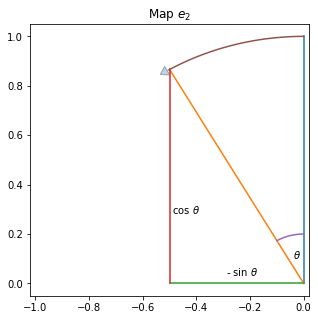

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (5,5), sharey=True,sharex=True)
ax.set_title('Map $e_{2}$')
e2_ax = np.pi/2
ax.set_xlim(-1.02,.02)

# e2
ax.plot(np.zeros(ny), np.linspace(0,1,ny))
# hypotenuse
e2_ray = np.array([np.cos(e2_ax + theta),np.sin(e2_ax + theta)])
e2_xs,e2_ys = make_line_segment (vec=e2_ray, xmin=np.cos(e2_ax+theta),xmax=0,nx=25)
ax.plot(e2_xs,e2_ys)

# horizontal leg
e2_zs = np.zeros(nx)
ax.plot(np.linspace(-np.sin(theta),0,nx),e2_zs)
# vertical leg
e2_cs = -np.sin(theta) * np.ones(nx)
e2_ray2 = np.linspace(0,np.cos(theta),ny)
ax.plot(e2_cs,e2_ray2)

###  Angle arc
e2_shrink_fac = 5
e2_angle_ts = np.linspace(0,theta,20)
e2_angle_xs = np.sin(e2_angle_ts)
e2_angle_ys = np.cos(e2_angle_ts)
ax.plot(-e2_angle_xs/e2_shrink_fac,e2_angle_ys/e2_shrink_fac)
###  Angle arc

# Circle arc
ax.plot(-e2_angle_xs,e2_angle_ys)

ax.annotate(r'$\theta$',(-.04,.1))
ax.annotate(r'- sin $\theta$',(-.29,.03))
ax.annotate(r'cos $\theta$',(-.49,.28))

## Draw arrow
delta_fac = .01
dx,dy = -np.sin(e2_ax+theta)*delta_fac,np.cos(e2_ax+theta)*delta_fac
ax.arrow(x = np.cos(e2_ax+theta), y=np.sin(e2_ax+theta), dx=dx,dy=dy,head_width=.04,head_length=.03,alpha=.3)

Similarly, 

$$
\left \lbrack\begin{array}{c}{\mathbf 0} \\{\mathbf 1}\end{array}\right\rbrack
$$

goes to


$$
\left \lbrack\begin{array}{ccc} - \sin \pi / 6\\ \hspace{8pt}  \cos \pi / 6\end{array}\right\rbrack
$$

We now know both columns of our 2x2 rotation matrix:

$$
\left \lbrack\begin{array}{ccc}
\cos \pi / 6 & - \sin \pi / 6 \\ 
\sin\pi / 6  &  \hspace{8pt}\cos \pi/6
\end{array}\right\rbrack
$$

So we take it out for a spin with the unit square

In [22]:
theta = np.pi/6

def rotation_matrix (theta):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

theta = np.pi/6
R = rotation_matrix(theta)

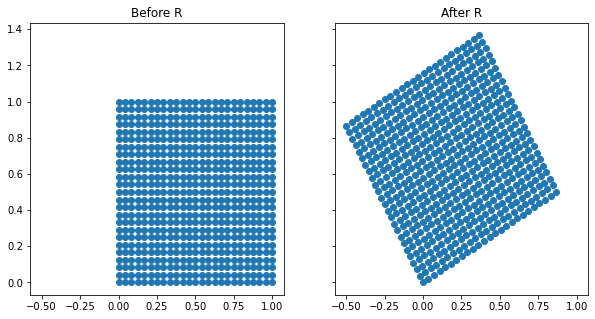

In [14]:
U = np.vstack([np.ravel(xv),np.ravel(yv)])
V = R.dot(U)
plot_mapping (xv, yv, V[0,:], V[1,:],name='R')

You can look at this picture and see very clearly what one vector gets mapped to itself by the
rotation (such a vector is called a **fixed point**).

$$\left \lbrack\begin{array}{c}{\mathbf 0} \\{\mathbf 0}\end{array}\right\rbrack.$$

And this is good because it's a theorem about linear maps that 0 is a fixed point.

Try rotating rectangles for clearer visualization

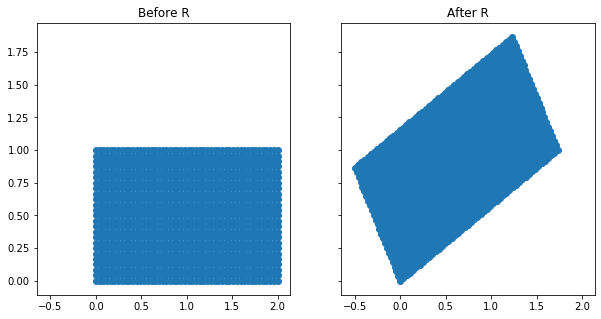

In [60]:
theta = np.pi/6
R = rotation_matrix(theta)
xv, yv = make_meshgrid (xmin=0,xmax=2,ymin=0,ymax = 1,nx =50)
U = np.vstack([np.ravel(xv),np.ravel(yv)])
V = R.dot(U)
plot_mapping (xv, yv, V[0,:], V[1,:], name='R')

## Dilation

Now, still thinking in terms of what happens to a polygon, in particular a square, suppose we want to grow our square **bigger**.   Say, we want to double the lengths of the sides.

Again we look at the results of performing those tasks on

$$
\left \lbrack\begin{array}{c}{\mathbf 1} \\{\mathbf 0}\end{array}\right\rbrack
$$

and

$$
\left \lbrack\begin{array}{c}{\mathbf 0} \\{\mathbf 1}\end{array}\right\rbrack
$$

For doubling lengths we want 

$$
\left \lbrack\begin{array}{c}{\mathbf 1} \\{\mathbf 0}\end{array}\right\rbrack
$$

to go to

$$
\left \lbrack\begin{array}{c} 2\\ 0\end{array}\right\rbrack
$$

Similarly, 

$$
\left \lbrack\begin{array}{c}{\mathbf 0} \\{\mathbf 1}\end{array}\right\rbrack
$$

goes to


$$
\left \lbrack\begin{array}{ccc} 0\\ 2\end{array}\right\rbrack
$$

And soi our 2x2 scaling matrix is

$$
\left \lbrack\begin{array}{ccc}
2 & 0\\ 
0 &  2
\end{array}\right\rbrack
$$

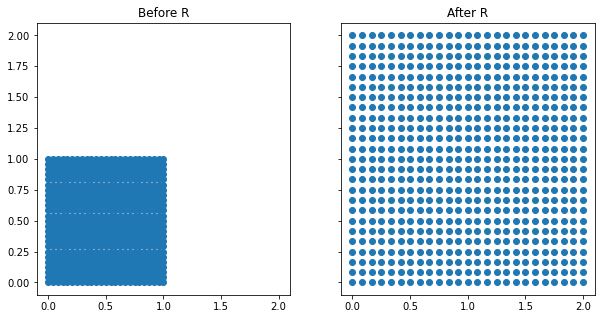

In [35]:
S= np.array([[2,0],[0,2]])
xv, yv = make_meshgrid (xmin=0,xmax=1,ymin=0,ymax = 1,nx =25)
U = np.vstack([np.ravel(xv),np.ravel(yv)])
V = S.dot(U)
plot_mapping (xv, yv, V[0,:], V[1,:],name='R')

Oops!  We scaled the square so much our pixels are showing! But the lengths do seem to have
doubled in size, as desired.  To get rid of the sudden pixel assault, we just rev up our resolution.

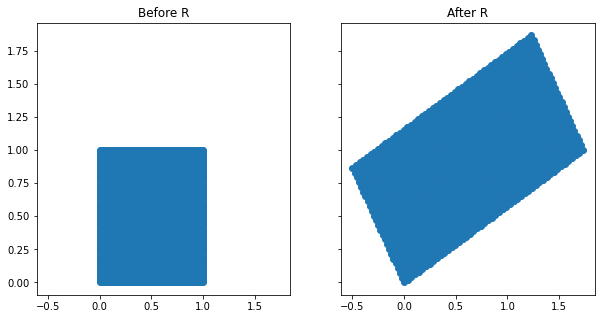

In [41]:
S= np.array([[2,0],[0,2]])
xv, yv = make_meshgrid (xmin=0,xmax=1,ymin=0,ymax = 1,nx =60,ny=60)
U = np.vstack([np.ravel(xv),np.ravel(yv)])
V = S.dot(U)
plot_mapping (xv, yv, V[0,:], V[1,:],name='R')

## Composition of Linear Maps

Now suppose we want to grow our square U by some factor
and then rotate it by some  angle $\theta$.

Using the examples above where the angle is $\pi/6$ and the factor is two, we could just do this:

$$
\left \lbrack\begin{array}{ccc}
\cos \pi / 6 & - \sin \pi / 6 \\ 
\sin\pi / 6  &  \hspace{8pt}\cos \pi/6
\end{array}\right\rbrack
\left ( \left \lbrack\begin{array}{ccc}
2 & 0\\ 
0 &  2
\end{array}\right\rbrack (\text{U})  \right )
$$

Now the math book tells us matrix multiplication is associative.  That means the above is 
equivalent to:

$$
\left ( \left \lbrack\begin{array}{ccc}
\cos \pi / 6 & - \sin \pi / 6 \\ 
\sin\pi / 6  &  \hspace{8pt}\cos \pi/6
\end{array}\right\rbrack
\left \lbrack\begin{array}{ccc}
2 & 0\\ 
0 &  2
\end{array}\right\rbrack  \right ) (\text{U})  
$$

The key point here is that if we want to find the matrix that **composes** (combines the effects of) two
linear mappings L${}_{1}$ and L${}_{2}$, we just need to matrix multiply their matrices:

$$
\left \lbrack\begin{array}{ccc}
\cos \pi / 6 & - \sin \pi / 6 \\ 
\sin\pi / 6  &  \hspace{8pt}\cos \pi/6
\end{array}\right\rbrack
\left \lbrack\begin{array}{ccc}
2 & 0\\ 
0 &  2
\end{array}\right\rbrack 
= 
\left \lbrack\begin{array}{ccc}
2 \cos \pi / 6 & - 2 \sin \pi / 6 \\ 
2 \sin\pi / 6  &  \hspace{8pt}2 \cos \pi/6
\end{array}\right\rbrack
$$


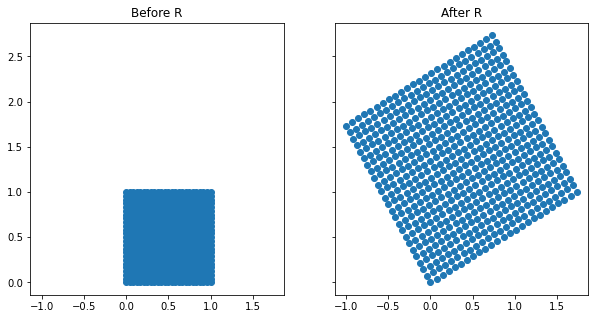

In [42]:
C = R.dot(S)
xv, yv = make_meshgrid (xmin=0,xmax=1,ymin=0,ymax = 1,nx =25)
U = np.vstack([np.ravel(xv),np.ravel(yv)])
V = C.dot(U)
plot_mapping (xv, yv, V[0,:], V[1,:],name='R')

## Reflection

To use what we know about composing linear maps, we tackle problem of reflection around
the line  L which goes through the origin and makes the angle $\theta$ with the x-axis.


Let's start with something simple, then compose our way
upward. First suppose we want to reflect a vector v 
around the x axis. Then any vector on the x-axis remains unchanged so in
particular,


$$
\left \lbrack\begin{array}{c}{\mathbf 1} \\{\mathbf 0}\end{array}\right\rbrack
$$

maps to 

$$
\left \lbrack\begin{array}{c} 1\\ 0\end{array}\right\rbrack
$$
 
But
 
$$
\left \lbrack\begin{array}{c}{\mathbf 0} \\{\mathbf 1}\end{array}\right\rbrack
$$

gets flipped around the x-axis so, it maps to 

$$
\left \lbrack\begin{array}{c} \hspace{6pt}0\\ -1\end{array}\right\rbrack .
$$
 
 
Now we know both columns of our 2x2 rotation matrix:

$$
\left \lbrack\begin{array}{ccc}
1 & \hspace{8pt}0 \\ 
0& -1
\end{array}\right\rbrack
$$

Call this map $T_{x}$.

But suppose we don't want to reflect the vector v around the x-axis.  Suppose as we said
initially, wa want to reflect 
 around the line  L which makes the angle $\theta$ with the x-axis.

Our plan is as follows.  We rotate the entire plane $-\theta$, so that L coincides with the x axis, we
reflect (because now we know how to do that), then we rotate back $\theta$.

Using $R_{\theta}$ for a rotation of $\theta$, that means our map is

$$
\text{R}_{\theta}\text{T}_{x}\text{R}_{-\theta}
$$

Writing this out as a matrix multiplication, it's


$$
\left \lbrack\begin{array}{ccc}
\cos  \theta & - \sin \theta\\ 
\sin \theta &  \hspace{8pt}\cos \theta
\end{array}\right\rbrack
\left \lbrack\begin{array}{ccc}
1 & 0\\ 
0 &  -1
\end{array}\right\rbrack
\left \lbrack\begin{array}{ccc}
\cos  - \theta & - \sin - \theta \\ 
\sin - \theta  &  \hspace{8pt}\cos -\theta
\end{array}\right\rbrack,
$$

which is


$$
\left \lbrack\begin{array}{ccc}
\cos  \theta & \hspace{8pt}\sin \theta  \\ 
\sin \theta  &  -\cos \theta
\end{array}\right\rbrack
\left \lbrack\begin{array}{ccc}
1 & 0\\ 
0 &  -1
\end{array}\right\rbrack
\left \lbrack\begin{array}{ccc}
\cos  \theta & \sin \theta \\ 
- \sin \theta  &  \hspace{8pt}\cos \theta
\end{array}\right\rbrack,
$$

which is

$$
\left \lbrack\begin{array}{ll}
\cos  \theta & - \sin \theta \\ 
\sin \theta &  \hspace{8pt}\cos \theta
\end{array}\right\rbrack
\left \lbrack\begin{array}{ll}
\cos  \theta & \hspace{8pt}\sin \theta \\ 
\sin \theta &  -\cos \theta
\end{array}\right\rbrack
=
\left \lbrack\begin{array}{ll}
\cos^2  \theta - \sin^2  \theta & 2 \cos \theta \;\sin \theta\\ 
2 \cos \theta \;\sin \theta & \sin^2  \theta - \cos^2  \theta\\ 
\end{array}\right\rbrack
=
\left \lbrack\begin{array}{ll}
\cos  2\theta  & \hspace{8pt}\sin 2\theta\\ 
\sin 2\theta & - \cos 2  \theta\\ 
\end{array}\right\rbrack
$$

The last step uses some well-known trigonmetric identities.  This looks like, but is not the same as, the matrix for rotation by $2\theta$. In fact what is is a reflection followed by a rotation of $2\theta$

$$
\left \lbrack\begin{array}{ll}
\cos  2\theta  & \hspace{8pt}\sin 2\theta\\ 
\sin 2\theta & - \cos 2  \theta\\ 
\end{array}\right\rbrack
=
\left \lbrack\begin{array}{ll}
\cos  2\theta & -\sin 2\theta \\ 
\sin 2\theta &  \hspace{8pt}\cos 2\theta
\end{array}\right\rbrack
\left \lbrack\begin{array}{ll}
1& \hspace{6pt}0\\ 
0&  -1
\end{array}\right\rbrack
$$

With the help of a diagram, it is fairly easy to see that this another sequence of transformations equivalent
to reflection around L.

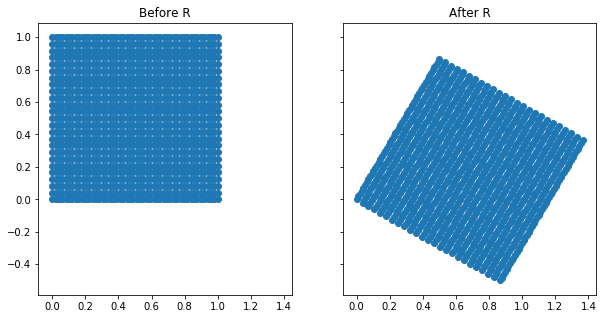

In [56]:

def reflection_matrix (theta):
    """
    If R_{\theta} is rotation by theta and T_{x} is reflection across the x-axis, then reflection is
    
    R_{\theta} T_{x}  R_{-\theta}
    
    Once the matrix multiplications for these three transformations are carried out, this turns
    out to be equivalent to the following matrix.
    """
    two_theta = 2*theta
    return np.array([[np.cos(two_theta),np.sin(two_theta)],[np.sin(two_theta),- np.cos(two_theta)]])

theta = np.pi/6
R = reflection_matrix(theta)
xv, yv = make_meshgrid (xmin=0,xmax=1,ymin=0,ymax = 1,nx =50)
U = np.vstack([np.ravel(xv),np.ravel(yv)])
V = R.dot(U)
plot_mapping (xv, yv, V[0,:], V[1,:], name='R')

Try 0

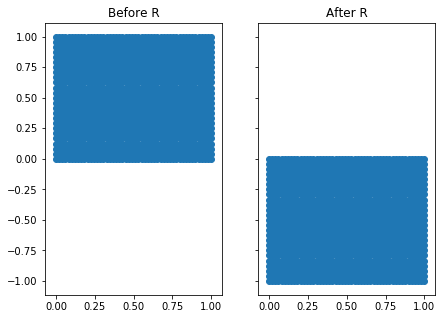

In [59]:
theta = 0
R = reflection_matrix(theta)
xv, yv = make_meshgrid (xmin=0,xmax=1,ymin=0,ymax = 1,nx =50)
U = np.vstack([np.ravel(xv),np.ravel(yv)])
V = R.dot(U)
plot_mapping (xv, yv, V[0,:], V[1,:], name='R',figsize=(7,5))

## More complex shapes

In [52]:
from PIL import ImageDraw,Image,ImageFont
import numpy as np

def make_text_image_array(unicode_text, font_file=None,font_dir= r'/Library/Fonts/',
                          font_family='Arial', font_type = 'ttf',
                          sz=48,w_marg=40,h_marg=40):
    if font_file is None:
        base = r'{font_family} Unicode.{font_type}'
        font_file = os.path.join(font_dir, base)
    font = ImageFont.truetype(font_file, sz, encoding="unic")
    text_width, text_height = font.getsize(unicode_text)
    canvas = Image.new('RGB', (text_width + 20, text_height + 20), "white")
    # Make an artist instance linked to that canvass
    draw = ImageDraw.Draw(canvas)
    draw.text((10,10), unicode_text, 'blue', font)    
    img_arr = np.array(canvas.im)
    (width,height) = canvas.size
    # Transposing gives inverted letter
    return img_arr[:,0].reshape(height,width).T

def img_array_to_coords(img_array, xdelta = -10, ydelta=60):
    """
    Convert to coords.
    
    Reflect the image on the X-axis (because the letter will be inmverted).
    
    Add enough delta to bring the entire letter above the X axis.
    """
    (r,c) = img_array.shape
    # 255 = white.  Get the coords of the non white pixels
    coords = [(i,j) for i in range (r) for j in range(c) if img_array[i,j] < 255]
    xvals,yvals = zip(*coords)
    #  We subtract the ydeltas because we're doing this BEFORE the reflection on X-axis
    #  A subtracted positive ydelta WILL turn into an upward movement after reflection
    U = np.vstack([np.array(xvals)+xdelta,np.array(yvals)-ydelta])
    # Reflection transformation: reflect on X-axis to get rightside up A
    Rf = np.array([[1,0],[0,-1]])
   
    return Rf.dot(U) #+ delta
 

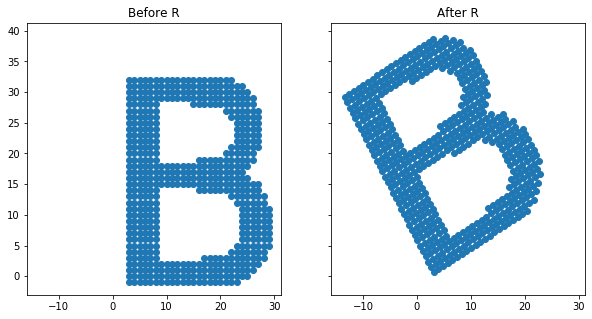

In [62]:
import os.path

font_dir = r'/Library/Fonts/'
font_file = os.path.join(font_dir, 'Arial Unicode.ttf')
unicode_text, sz, w_marg, h_marg= 'B', 48, 40, 40
img_arr = make_text_image_array(unicode_text, font_file, sz=sz,w_marg=w_marg,h_marg=h_marg)
U = img_array_to_coords(img_arr)

theta = np.pi/6
R = rotation_matrix(theta)
V = R.dot(U)
plot_mapping (U[0,:], U[1,:], V[0,:], V[1,:], name='R')

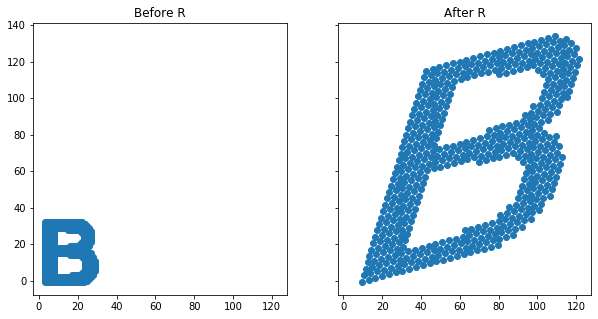

In [65]:
#theta = np.pi/6
#R = rotation_matrix(theta)
#V = R.dot(U)
L = np.array([[3.5,1],[1,3.5]])
V = L.dot(U)
plot_mapping (U[0,:], U[1,:], V[0,:], V[1,:], name='R')